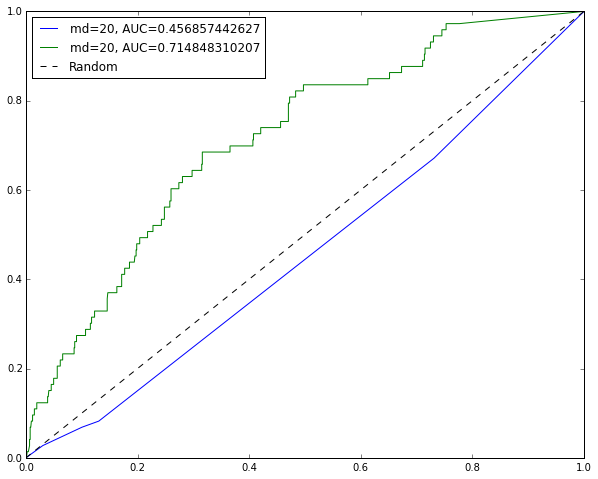

In [8]:
import sys
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split

data = pd.read_csv("translated_1000_train_1.csv")
test_data = pd.read_csv("translated_1000_train_2.csv")

X = data.drop(['9'], 1)
Y = data['9']

A = test_data.drop(['9'], 1)
B = test_data['9']

binary_vectorizer = CountVectorizer(binary=True)

binary_vectorizer.fit(data['2'])

matrix = binary_vectorizer.transform(data['2'])

df = pd.DataFrame(matrix.toarray().transpose(), index = binary_vectorizer.get_feature_names())

df_tr = pd.DataFrame.transpose(df)

result = pd.concat([X, df_tr], axis=1)

test_result = pd.concat([A, df_tr], axis=1)

for i in range (3,5):
    
    column_string = str(i)
    
    binary_vectorizer.fit(data[column_string])
    
    matrix = binary_vectorizer.transform(data[column_string])

    df = pd.DataFrame(matrix.toarray().transpose(), index = binary_vectorizer.get_feature_names())

    df_tr = pd.DataFrame.transpose(df)

    result = pd.concat([result, df_tr], axis=1)
    
    test_result = pd.concat([test_result, df_tr], axis=1)
    
result = result.drop(['1'],1)
result = result.drop(['2'],1)
result = result.drop(['3'],1)
result = result.drop(['4'],1)
result = result.drop(['5'],1)
result = result.drop(['6'],1)
result = result.drop(['8'],1)

test_result = test_result.drop(['1'],1)
test_result = test_result.drop(['2'],1)
test_result = test_result.drop(['3'],1)
test_result = test_result.drop(['4'],1)
test_result = test_result.drop(['5'],1)
test_result = test_result.drop(['6'],1)
test_result = test_result.drop(['8'],1)

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
logistic = LogisticRegression()

tree.fit(result, Y)
logistic.fit(result, Y)

Y_test_probabilities_tree = tree.predict_proba(test_result)[:, 1]
Y_test_probabilities_logistic = logistic.predict_proba(test_result)[:, 1]

fpr_tree, tpr_tree, thresholds_tree = roc_curve(B, Y_test_probabilities_tree)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(B, Y_test_probabilities_logistic)

auc1 = roc_auc_score(B, Y_test_probabilities_tree)
auc2 = roc_auc_score(B, Y_test_probabilities_logistic)

auc = round(auc, 2)

plt.plot(fpr_tree, tpr_tree, label="md=" + str(20) + ", AUC=" + str(auc1))
plt.plot(fpr_logistic, tpr_logistic, label="md=" + str(20) + ", AUC=" + str(auc2))

#Y_predicted = tree.predict(result)

#accuracy = accuracy_score(Y_predicted, Y)

#get_code(tree, result.columns)

#print "The accuracy is " + str(accuracy)

plt.plot([0,1.0], [0,1.0], 'k--', label="Random")
plt.legend(loc=2)

plt.show()